In [5]:
import sys
sys.path.append('/usr/lib/python3/dist-packages')
import os
import pandas as pd
import datetime
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_notebook
import json
#import shapefile
#from shapely.geometry  import Point, LineString, Polygon, MultiPolygon

from django.conf import settings
#from sqlalchemy import create_engine
os.environ["DJANGO_SETTINGS_MODULE"] = "mysite.settings"
import django
django.setup()
from tqdm import tqdm_notebook, tqdm
import glob

from django.db.models import Q, Sum, Avg

In [6]:
from pyproj import Proj, transform

PROJ3857  = Proj("+init=EPSG:3857")
PROJ4326 = Proj("+init=EPSG:4326")

In [18]:
from main_map.models import OrganizationNatClass, House, Metro, MetroStation, PolygonModel, GroundStop, OperSquare
from main_map.models import Workplace, House, MetroStation, Metro, GroundStop, SalePoint, City, TimePolygons, AlcoStopper
from main_map.models import TimePolygons, TimePolygonsUnion


from django.core import serializers
from django.utils.safestring import mark_safe

    
lat_max, lon_max = 55.776414, 37.653876
lat_min, lon_min = 55.735349, 37.576666

In [8]:
TimePolygons

main_map.models.TimePolygons

In [19]:
obj = TimePolygonsUnion.objects.all()[0]

In [10]:
import json

In [11]:
from shapely import geometry


In [22]:
TimePolygonsUnion.objects.all().count()

5980

In [12]:
if poly.geom_type == 'MultiPolygon':
    print('  ')

NameError: name 'poly' is not defined

In [31]:
pd.DataFrame(list(OrganizationNatClass.objects.all().values()))['nat_class'].value_counts()

Банкомат                                    91333
Кафе                                        61711
Аптека                                      56685
Супермаркет                                 46263
Банк                                        33662
Ресторан                                    24067
Магазин продуктов                           21810
Торговый центр                              17055
Кофейня                                     12114
Бар, паб                                     9634
Быстрое питание                              8045
Доставка еды и обедов                        7018
Пиццерия                                     6969
Банкетный зал                                4273
Магазин мяса, колбас                         3669
Кондитерская                                 3285
Обмен валюты                                 3279
Суши-бар                                     3149
Булочная, пекарня                            2588
Кальян-бар                                   2315


In [29]:
for obj in tqdm_notebook(TimePolygons.objects.all()):

    x= json.loads(obj.geojson)['coordinates']
    poly = geometry.Polygon(x[0])
    try:
        
        coords = poly.buffer(100, join_style=1).buffer(-100.0, join_style=1).exterior.coords.xy
    except:
        continue
    dic ={
        'type': 'Polygon',
         'coordinates':[list(map(list,zip(coords[0],coords[1])))]
    }
    obj.geojson_smoothed = json.dumps(dic)
    obj.save()

In [27]:
obj.geojson

'{"type": "Polygon", "coordinates": [[[4184425.0, 7461735.0], [4184425.0, 7461725.0], [4184425.0, 7461715.0], [4184425.0, 7461705.0], [4184425.0, 7461695.0], [4184425.0, 7461685.0], [4184425.0, 7461675.0], [4184425.0, 7461665.0], [4184425.0, 7461655.0], [4184425.0, 7461645.0], [4184425.0, 7461635.0], [4184425.0, 7461625.0], [4184425.0, 7461615.0], [4184425.0, 7461605.0], [4184425.0, 7461595.0], [4184425.0, 7461585.0], [4184425.0, 7461575.0], [4184425.0, 7461565.0], [4184425.0, 7461555.0], [4184425.0, 7461545.0], [4184425.0, 7461535.0], [4184425.0, 7461525.0], [4184425.0, 7461515.0], [4184425.0, 7461505.0], [4184425.0, 7461495.0], [4184425.0, 7461485.0], [4184425.0, 7461475.0], [4184425.0, 7461465.0], [4184425.0, 7461455.0], [4184425.0, 7461445.0], [4184425.0, 7461435.0], [4184425.0, 7461425.0], [4184425.0, 7461415.0], [4184415.0, 7461415.0], [4184405.0, 7461415.0], [4184405.0, 7461405.0], [4184395.0, 7461405.0], [4184385.0, 7461405.0], [4184385.0, 7461395.0], [4184375.0, 7461395.0], [4

In [28]:
obj.geojson_smoothed

'{"type": "Polygon", "coordinates": [[4183945.117861112, 7461495.055744155], [4183945.0, 7461497.454862212], [4183945.0, 7461522.545137788], [4183945.119133632, 7461524.97015858], [4183946.860251055, 7461528.651442073], [4183950.6157282614, 7461537.717966078], [4183953.4644470625, 7461547.108933427], [4183954.6865888345, 7461553.253055023], [4183955.095137864, 7461554.884074176], [4183957.454862219, 7461555.0], [4183972.545137781, 7461555.0], [4183974.970158579, 7461554.880866367], [4183975.56173685, 7461554.601070683], [4183985.786216975, 7461550.439267459], [4183996.4071221733, 7461547.429786995], [4184007.295025457, 7461545.609302999], [4184018.317246184, 7461545.0], [4184031.682753816, 7461545.0], [4184042.704974543, 7461545.609302999], [4184053.5928778267, 7461547.429786995], [4184064.213783025, 7461550.439267459], [4184074.43826315, 7461554.601070683], [4184076.0449128943, 7461555.360959419], [4184083.072422156, 7461558.271849066], [4184091.7271872326, 7461562.897917379], [418409

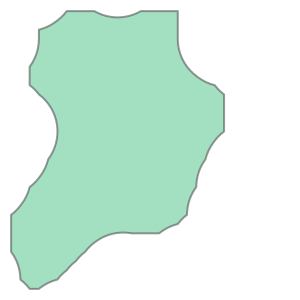

In [32]:
poly.buffer(100, join_style=1).buffer(-100.0, join_style=1)

In [41]:
from shapely import geometry

In [23]:
import matplotlib.pyplot as plt
import numpy as np

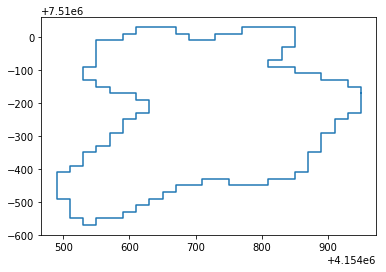

In [40]:
plt.plot(np.transpose(x)[0],np.transpose(x)[1])
plt.show()

In [9]:
df = pd.DataFrame(list(OrganizationNatClass.objects.all().values()))

In [ ]:
Супермаркет
Магазин продуктов
Бар, паб
Ресторан

In [11]:
df['nat_class'].value_counts()

Банкомат                                           91345
Кафе                                               89456
Аптека                                             56690
Ресторан                                           52904
Супермаркет                                        48073
Банк                                               33662
Бар, паб                                           21884
Кофейня                                            18008
Торговый центр                                     17063
Быстрое питание                                    13739
Магазин продуктов                                  13404
Доставка еды и обедов                              11944
Пиццерия                                           11877
Банкетный зал                                       7913
Суши-бар                                            5540
Кальян-бар                                          4834
Кондитерская                                        4420
Булочная, пекарня              

In [75]:
AlcoStopper.objects.all().count()

18465

In [4]:
df_full_russian = pd.read_csv('/home/tserekh/abc/objects_new.csv')

/home/tserekh/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_full_russian['cafe'] = df_full_russian['Строгие']!=1

In [6]:
df_full_russian = df_full_russian[['Название','Категории','Координаты Широта','Координаты Долгота','Адрес полностью','cafe']]

In [7]:
df_full_russian = df_full_russian.rename(columns={'Название':'chain_name',
                                'Категории':'nat_class',
                                'Координаты Широта':'lat',
                                'Координаты Долгота':'lon',
                                'Адрес полностью':'address'
                               }
                      )

In [8]:
s = AlcoStopper.objects.all()

In [9]:
df_full_russian = df_full_russian.reset_index()
df_full_russian = df_full_russian.rename(columns = {'index':'source_id'})
df_full_russian['source_name'] = 'kate'

In [10]:
df_full_russian['lat'] = df_full_russian['lat'].apply(lambda x: float(str(x).replace(',','.') ))
df_full_russian['lon'] = df_full_russian['lon'].apply(lambda x: float(str(x).replace(',','.') ))

In [11]:
import matplotlib.pyplot as plt

In [12]:
AlcoStopper.objects.all().delete()

(17255, {'main_map.AlcoStopper': 17255})

In [13]:
new_dicts = []
for i, row in df_full_russian.iterrows():
    dic = row.to_dict()
    dic['nat_class'] = dic['nat_class'].lower()
    for nat_class in dic['nat_class'].split(' | '):
        new_dict = dic.copy()
        new_dict['nat_class'] = nat_class
        new_dicts.append(new_dict)

In [14]:
for el in pd.DataFrame(new_dicts)['nat_class'].value_counts().index[:100]:
    print(el)

медицинское учреждение
детский сад
образовательная организация
студенческое общежитие
библиотека
рынок
спортивный комплекс
железнодорожная станция
военное учреждение


In [15]:
# AlcoStopper.objects.all().delete()

In [16]:
for i, row in tqdm_notebook(pd.DataFrame(new_dicts).iterrows()):
    ob = AlcoStopper(**row.to_dict())
    ob.save()

In [17]:
nat_class

'медицинское учреждение'

In [18]:
def conver_to_list(pol):
    '''
    Convert POLYGON(()) in string format to list of lists of coords
    '''
    pol = pol.replace('POLYGON ((','')
    pol = pol.replace(')','')
    pol = list(map(lambda x: [float(x.split(' ')[0]),float(x.split(' ')[1])]  , pol.split(', ')))
    return pol
def get_words_dates(path):
    filename= path.split('/')[-1].split('.')[0]
    date = filename[-17:]
    date = datetime.datetime.strptime(date, '%Y-%m-%d_%H%M%S')
    word = filename[:-17]
    return (word, date,path)

In [19]:
polygon = TimePolygons()

polygon.x, polygon.y  = transform(PROJ4326, PROJ3857,  37.618522, 55.755996)

In [20]:
need_org_cols =  ['lat','lon','nat_class']

In [21]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [23]:
def add_polygon_type(shapefile_path, scale,limit=False):
    
    need_home_cols = ['lat','lon','flat_num','square', 'sale_price']
    objects = House.objects.filter().values().order_by('?').values_list(*need_home_cols)
    df_homes = pd.DataFrame(list(objects), columns = need_home_cols)
    df_homes['point'] = df_homes.apply(lambda row:  Point([row['lat'],row['lon']]), axis=1)
    
    sf = shapefile.Reader(shapefile_path)
    ind = 0
    for el in tqdm(sf.iterShapeRecords()):


        lons = np.array(el.shape.points)[:,1]
        lats = np.array(el.shape.points)[:,0]
        distances = [0] + list(((lons[1:] - lons[:-1])**2 + (lats[1:] - lats[:-1])**2)**0.5)
        distances = np.array(distances)
        distances_bool = distances>0.05
        if el.record[2]=='Kuncevo':
            distances_bool = distances>0.02
        distances_classes = []
        prev = 0
        for bool_ in distances_bool:
            prev+=int(bool_)
            distances_classes.append(prev)
        distances_classes = np.array(distances_classes)

        for class_ in sorted(set(distances_classes)):
                
            dic = {}
            lons_class = lons[distances_classes==class_]
            lats_class = lats[distances_classes==class_]

            points = list(zip(lons_class,lats_class))

            if limit:
                lon, lat = el.shape.points[0]
                if (lat > lat_max)|(lat < lat_min):
                    continue
                if (lon > lon_max)|(lon < lon_min):
                    continue
            dic['eng_name'] = el.record[2]
#            print(dic['eng_name'])
#             if dic['eng_name']=='Kuncevo':
#                 plt.scatter(lons_class,lats_class)
#                 plt.show()
#             else:
#                 continue
            polygon = Polygon(points)
            dic['points'] = str(Polygon(points))
        
            center = polygon.centroid.wkt
            center = center.replace('POINT (','')
            center = center.replace(')','')
            dic['lat'] = float(center.split(' ')[0])
            dic['lon'] = float(center.split(' ')[1])
            
            dic['scale'] = scale
            
            filt = []
            for i,row in (df_homes.iterrows()):
                filt.append(polygon.contains(row['point']))

            if sum(filt) != 0:        
                df_homes_sub = df_homes[filt]
                dic['sale_price'] = (df_homes_sub['square']*df_homes_sub['sale_price']).sum()/df_homes_sub['square'].sum()
                dic['flat_num'] = df_homes_sub['flat_num'].sum()
            else:
                dic['sale_price'] = 0
                dic['flat_num'] = 0
                continue
                
            polygon_model = PolygonModel(**dic)
            polygon_model.save()
            ind+=1


In [24]:
#add_polygon_type('/home/tserekh/abc_data/geofabrik/cent_fed/gis_osm_landuse_a_free_1.shp','land',True)

In [25]:
# add_polygon_type('../../moscow_shape/moscow_adm.shp','district',False)

In [26]:
# PolygonModel.objects.all().delete()

In [27]:
# PolygonModel.objects.filter(**{'scale': 'district'}).delete()

In [28]:
# count = PolygonModel.objects.all().count()
# if count!=0:
#     print('Objects:', count)
#     print("don't need to insert")
# else:

#     add_polygon_type(
#         ** {
#                 'shapefile_path':'../junk/moscow_shape/moscow_adm.shp',
#                 'scale': 'district'
#             })

In [29]:
def get_spec_fields(x):
    dic = {}
    dic['lat'] = x.lat
    dic['lon'] = x.lon
    dic['exit_name'] = x.exit_name
    dic['info'] = x.info
    dic['station_name'] = x.station_name
    return dic

In [30]:
a = list(map(get_spec_fields, Metro.objects.all()))
df_metro = pd.DataFrame(a)

In [31]:
df_metro = pd.read_excel('data/metro.xlsx')
df_metro = df_metro.rename(
    columns = {
    'Longitude_WGS84':'lon',
    'Latitude_WGS84':'lat',
    'NameOfStation':'station_name',
    'Name':'exit_name',
    'ID':'source_id'
    }
)

In [32]:
df_metro_stations = df_metro.groupby('station_name').agg({'lat':'mean','lon':'mean'})
df_metro_stations = df_metro_stations.reset_index()

In [33]:
count = MetroStation.objects.count()
if count!=0:
    print('Objects:', count)
    print("don't need to insert")
else:

    features = ['lat','lon','station_name']

    print(len(df_metro_stations))
    for i, row in tqdm(df_metro_stations[features].iterrows()):
        metro_station = MetroStation(**row.to_dict())
        metro_station.save()

Objects: 215
don't need to insert


In [34]:
filter_dic = {
    'geojson__isnull' : False,
    }
need_cols = ['geojson','time']
objects = TimePolygons.objects.filter(**filter_dic).values().values_list(*need_cols)
context = list(objects)

In [35]:
list(map(lambda x: json.loads(x[0])['coordinates'],objects))

[[[[4154950.0, 7509830.0],
   [4154950.0, 7509810.0],
   [4154950.0, 7509810.0],
   [4154950.0, 7509790.0],
   [4154950.0, 7509790.0],
   [4154950.0, 7509770.0],
   [4154950.0, 7509770.0],
   [4154930.0, 7509770.0],
   [4154930.0, 7509770.0],
   [4154930.0, 7509750.0],
   [4154930.0, 7509750.0],
   [4154910.0, 7509750.0],
   [4154910.0, 7509750.0],
   [4154910.0, 7509730.0],
   [4154910.0, 7509730.0],
   [4154910.0, 7509710.0],
   [4154910.0, 7509710.0],
   [4154890.0, 7509710.0],
   [4154890.0, 7509710.0],
   [4154890.0, 7509690.0],
   [4154890.0, 7509690.0],
   [4154890.0, 7509670.0],
   [4154890.0, 7509670.0],
   [4154890.0, 7509650.0],
   [4154890.0, 7509650.0],
   [4154870.0, 7509650.0],
   [4154870.0, 7509650.0],
   [4154870.0, 7509630.0],
   [4154870.0, 7509630.0],
   [4154870.0, 7509610.0],
   [4154870.0, 7509610.0],
   [4154870.0, 7509590.0],
   [4154870.0, 7509590.0],
   [4154850.0, 7509590.0],
   [4154850.0, 7509590.0],
   [4154850.0, 7509570.0],
   [4154850.0, 7509570.0],
 

In [36]:
json.loads(objects[0][0])['coordinates']

[[[4154950.0, 7509830.0],
  [4154950.0, 7509810.0],
  [4154950.0, 7509810.0],
  [4154950.0, 7509790.0],
  [4154950.0, 7509790.0],
  [4154950.0, 7509770.0],
  [4154950.0, 7509770.0],
  [4154930.0, 7509770.0],
  [4154930.0, 7509770.0],
  [4154930.0, 7509750.0],
  [4154930.0, 7509750.0],
  [4154910.0, 7509750.0],
  [4154910.0, 7509750.0],
  [4154910.0, 7509730.0],
  [4154910.0, 7509730.0],
  [4154910.0, 7509710.0],
  [4154910.0, 7509710.0],
  [4154890.0, 7509710.0],
  [4154890.0, 7509710.0],
  [4154890.0, 7509690.0],
  [4154890.0, 7509690.0],
  [4154890.0, 7509670.0],
  [4154890.0, 7509670.0],
  [4154890.0, 7509650.0],
  [4154890.0, 7509650.0],
  [4154870.0, 7509650.0],
  [4154870.0, 7509650.0],
  [4154870.0, 7509630.0],
  [4154870.0, 7509630.0],
  [4154870.0, 7509610.0],
  [4154870.0, 7509610.0],
  [4154870.0, 7509590.0],
  [4154870.0, 7509590.0],
  [4154850.0, 7509590.0],
  [4154850.0, 7509590.0],
  [4154850.0, 7509570.0],
  [4154850.0, 7509570.0],
  [4154830.0, 7509570.0],
  [4154830.0

In [37]:
count = Metro.objects.count()
if count!=0:
    print('Objects:', count)
    print("don't need to insert")
else:

    df_metro = pd.read_excel('data/metro.xlsx')
    df_metro = df_metro.rename(
        columns = {
        'Longitude_WGS84':'lon',
        'Latitude_WGS84':'lat',
        'NameOfStation':'station_name',
        'Name':'exit_name',
        'ID':'source_id'
        }
    )

    df_metro['source_name'] = 'data.mos'

    df_metro['info'] = df_metro['Line'] + '\nЧетные дни:\n' + df_metro['ModeOnEvenDays'] +\
        '\nНечетные дни:\n' + df_metro['ModeOnOddDays']

    features = ['lat','lon','station_name','exit_name','source_id','source_name','info']

    print(len(df_metro))
    for i, row in tqdm(df_metro[features].iterrows()):
        metro = Metro(**row.to_dict())
        metro.save()

Objects: 1042
don't need to insert


In [38]:
# House.objects.all().delete()

In [39]:

#reformagkh_id	square_live	live_rooms	appartments	id	geocode	lon	lat


In [40]:
count = House.objects.count()
if count!=0:
    print('Objects:', count)
    print("don't need to insert")
else:

    #df_homes = pd.read_excel('data/Жилые дома с числом квартир и ценой v4.xlsx')
    df_homes = pd.read_excel('/home/tserekh/abc_data/evil/appartments.xlsx')
    df_homes = df_homes.drop('id', axis =1)

    min_lat_kr, min_lon_kr = 55.752600, 37.614400
    max_lat_kr, max_lon_kr = 55.756871, 37.627532
    filt1 = df_homes['lat']>=min_lat_kr
    filt2 = df_homes['lat']<=max_lat_kr
    filt3 = df_homes['lon']>=min_lon_kr
    filt4 = df_homes['lon']<=max_lon_kr
    filt = filt1&filt2&filt3&filt4
    filt = filt==False
    df_homes = df_homes[filt]

    df_homes = df_homes.rename(columns = {
        'reformagkh_id':'source_id',
        'geocode':'address',
        'square_live':'square',
        'appartments':'flat_num',
    })
    df_homes['source_name'] = 'reformagkh'

    features = ['lat', 'lon', 'address', 'source_id', 'source_name', 'square',
                'flat_num']

    print(len(df_homes))
    for i, row in tqdm_notebook(df_homes[features].iterrows()):
        house = House(**row.to_dict())
        house.save()

Objects: 540544
don't need to insert


In [41]:
count = GroundStop.objects.count()
if count!=0:
    print('Objects:', count)
    print("don't need to insert")
else:


    df_stops = pd.read_csv('data/stops.csv',sep=';',encoding='cp1251')
    df_stops = df_stops.rename(
        columns = {
            'Name':'stop_name',
            'Longitude_WGS84':'lon',
            'Latitude_WGS84':'lat',
            'global_id':'source_id'
        })
    df_stops['n_lines'] = df_stops['RouteNumbers'].apply(lambda x: len(x.split(';')))
    df_stops['source_name'] = 'data.mos'
    features = ['stop_name', 'lon', 'lat', 'source_id', 'source_name','n_lines']

    print(len(df_stops))
    for i, row in tqdm(df_stops[features].iterrows()):
        stop = GroundStop(**row.to_dict())
        stop.save()

Objects: 10898
don't need to insert


In [42]:
count = City.objects.count()
if count!=0:
    print('Objects:', count)
    print("don't need to insert")
else:
    df_cities = pd.read_excel('data/cities.xlsx')
    df_cities = df_cities.drop('population', axis=1)
    df_cities = df_cities.rename(columns = {'city':'name'})
    df_cities['source_id'] = df_cities.index
    df_cities['source_name'] = 'hand'

    print(len(df_cities))
    for i, row in tqdm(df_cities.iterrows()):
        city = City(**row.to_dict())
        city.save()

Objects: 19
don't need to insert


In [43]:
model_list = [House, OrganizationNatClass, Workplace, MetroStation, Metro, GroundStop,City,AlcoStopper]
for Model in model_list:
    for el in tqdm(Model.objects.filter(x__isnull=True)):
        el.x, el.y = transform(PROJ4326, PROJ3857, el.lon, el.lat)
        el.save()


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 18465/18465 [00:55<00:00, 329.89it/s]


In [48]:
pd.DataFrame(list(AlcoStopper.objects.all().values()))['cafe'].value_counts(dropna=False)

False    10099
True      8366
Name: cafe, dtype: int64

In [56]:
need_cols = ['cafe']

In [59]:
list(TimePolygons.objects.filter(cafe=False).values().values_list(*need_cols))

[(False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),
 (False,),